In [97]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import statistics
import matplotlib

In [ ]:
# Курс - сочетание предмета и семестра

In [19]:
assessments = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-salmanova/first_project/assessments.csv')
courses = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-salmanova/first_project/courses.csv')
student_assessment = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-salmanova/first_project/studentAssessment.csv')
student_registration = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-salmanova/first_project/studentRegistration.csv')

In [20]:
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [21]:
student_assessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [23]:
# 1. Сколько студентов успешно сдали только один курс? 
merged_df = pd.merge(student_assessment, assessments, on='id_assessment', how='inner')

In [24]:
merged_df['result'] = merged_df['score'] >= 40

In [25]:
merged_df['course_id'] = merged_df['code_module'] + merged_df['code_presentation']
merged_df

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,result,course_id
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0,True,AAA2013J
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0,True,AAA2013J
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0,True,AAA2013J
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0,True,AAA2013J
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0,True,AAA2013J
...,...,...,...,...,...,...,...,...,...,...,...,...
173907,37443,527538,227,0,60.0,GGG,2014J,CMA,229.0,0.0,True,GGG2014J
173908,37443,534672,229,0,100.0,GGG,2014J,CMA,229.0,0.0,True,GGG2014J
173909,37443,546286,215,0,80.0,GGG,2014J,CMA,229.0,0.0,True,GGG2014J
173910,37443,546724,230,0,100.0,GGG,2014J,CMA,229.0,0.0,True,GGG2014J


In [26]:
courses_passed = merged_df.query("assessment_type == 'Exam' & result == True").groupby('id_student', as_index=False).agg({'course_id' : 'nunique'})
courses_passed.head()

,id_student,course_id
0,23698,1
1,24213,1
2,27116,1
3,28046,1
4,28787,1


In [27]:
courses_passed_count = courses_passed.groupby('id_student')['course_id'].sum()

In [28]:
students_with_1 = (courses_passed_count == 1).sum()
students_with_1

3802

In [29]:
# Ответ 1 = 3802

In [30]:
# 2. Выяви самый сложный и самый простой экзамен: 
#    найди курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью
#    *завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен

In [31]:
passed_exams = merged_df[merged_df['score'] >= 40].groupby(['id_assessment', 'weight'])['id_student'].count().reset_index()
passed_exams.columns = ['id_assessment', 'weight', 'successful_attempts']
passed_exams_100 = passed_exams.query("weight == 100.0")
passed_exams_100                                                            

,id_assessment,weight,successful_attempts
56,24290,100.0,664
65,24299,100.0,1019
72,25340,100.0,504
86,25354,100.0,878
93,25361,100.0,485
100,25368,100.0,842


In [32]:
total_attempts = merged_df.groupby(['id_assessment', 'weight'])['id_student'].count().reset_index()
total_attempts.columns = ['id_assessment', 'weight', 'total_attempts']
total_attempts_100 = total_attempts.query("weight == 100.0")
total_attempts_100    

,id_assessment,weight,total_attempts
56,24290,100.0,747
65,24299,100.0,1168
72,25340,100.0,602
86,25354,100.0,968
93,25361,100.0,524
100,25368,100.0,950


In [33]:
exam_completion = pd.merge(passed_exams_100, total_attempts_100, on='id_assessment', how='left')

In [34]:
exam_completion['completion_rate'] = exam_completion['successful_attempts'] / exam_completion['total_attempts']
exam_completion

,id_assessment,weight_x,successful_attempts,weight_y,total_attempts,completion_rate
0,24290,100.0,664,100.0,747,0.888889
1,24299,100.0,1019,100.0,1168,0.872432
2,25340,100.0,504,100.0,602,0.837209
3,25354,100.0,878,100.0,968,0.907025
4,25361,100.0,485,100.0,524,0.925573
5,25368,100.0,842,100.0,950,0.886316


In [35]:
exam_completion['completion_rate'].min()
most_difficult_exam = exam_completion.query("completion_rate == 0.8372093023255814")
most_difficult_exam

,id_assessment,weight_x,successful_attempts,weight_y,total_attempts,completion_rate
2,25340,100.0,504,100.0,602,0.837209


In [36]:
exam_completion['completion_rate'].max()
easiest_exam = exam_completion.query("completion_rate == 0.9255725190839694")
easiest_exam

,id_assessment,weight_x,successful_attempts,weight_y,total_attempts,completion_rate
4,25361,100.0,485,100.0,524,0.925573


In [37]:
# ОТВЕТ : сложный = 25340 
#         легкий = 25361 

In [38]:
# 3. По каждому предмету определи средний срок сдачи экзаменов 
#    (под сдачей понимаем последнее успешное прохождение экзамена студентом). !!!!!!!!!!!!!!!

In [39]:
data = pd.merge(merged_df, courses, on=['code_module', 'code_presentation'], how='left')

In [40]:
all_exams = merged_df.query("assessment_type == 'Exam'")
all_exams

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,result,course_id
52923,24290,558914,230,0,32.0,CCC,2014B,Exam,NaN,100.0,False,CCC2014B
52924,24290,559706,234,0,78.0,CCC,2014B,Exam,NaN,100.0,True,CCC2014B
52925,24290,559770,230,0,54.0,CCC,2014B,Exam,NaN,100.0,True,CCC2014B
52926,24290,560114,230,0,64.0,CCC,2014B,Exam,NaN,100.0,True,CCC2014B
52927,24290,560311,234,0,100.0,CCC,2014B,Exam,NaN,100.0,True,CCC2014B
...,...,...,...,...,...,...,...,...,...,...,...,...
95980,25368,652680,243,0,91.0,DDD,2014J,Exam,NaN,100.0,True,DDD2014J
95981,25368,652732,249,0,47.0,DDD,2014J,Exam,NaN,100.0,True,DDD2014J
95982,25368,652965,242,0,87.0,DDD,2014J,Exam,NaN,100.0,True,DDD2014J
95983,25368,653051,242,0,27.0,DDD,2014J,Exam,NaN,100.0,False,DDD2014J


In [41]:
all_exams.isna().sum()

id_assessment           0
id_student              0
date_submitted          0
is_banked               0
score                   0
code_module             0
code_presentation       0
assessment_type         0
date                 2865
weight                  0
result                  0
course_id               0
dtype: int64

In [42]:
avg_pass = all_exams.query("result == 1").groupby('code_module', as_index=False).agg({'date_submitted' : 'mean'})
avg_pass

,code_module,date_submitted
0,CCC,239.345217
1,DDD,237.976006


In [43]:
data['date'] = data['date'].mask(data['date'].isna(), data['module_presentation_length'])
data['days_before_deadline'] = data['date'] - data['date_submitted']

In [44]:
#средний срок сдачи экзамена до даты дедлайна
avg_pass_deadline = data.query("assessment_type == 'Exam'").groupby('code_module', as_index=False)['days_before_deadline'].mean()
avg_pass_deadline

,code_module,days_before_deadline
0,CCC,18.668930
1,DDD,15.814717


In [45]:
# Ответ - среднее время прохождения экзаменов по предмету:
#         ССС - 239 дней, по предмету DDD - 237 дней

In [46]:
# 4. Выяви самые популярные предметы (ТОП-3) по количеству регистраций на них. 
#    А также предметы с самым большим оттоком (ТОП-3).

In [48]:
student_registration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [49]:
popular = student_registration.groupby('code_module')['date_registration'].count().reset_index()
popular_sorted = popular.sort_values(by='date_registration', ascending=False)
popular_sorted.head(3)

,code_module,date_registration
1,BBB,7900
5,FFF,7751
3,DDD,6257


In [51]:
unpopular = student_registration.groupby('code_module')['date_unregistration'].count().reset_index()
unpopular_sorted = unpopular.sort_values(by='date_unregistration', ascending=False)
unpopular_sorted.head(3)

,code_module,date_unregistration
5,FFF,2380
1,BBB,2377
3,DDD,2235


In [48]:
# ОТВЕТ : ТОП-3 по кол-во регистр - BBB, FFF, DDD
#         ТОП-3 по оттоку - FFF, BBB, DDD

In [49]:
# 5. Используя pandas, в период с начала 2013 по конец 2014 
#    выяви семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов.

In [52]:
merged_df.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,result,course_id
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0,True,AAA2013J
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0,True,AAA2013J
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0,True,AAA2013J
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0,True,AAA2013J
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0,True,AAA2013J


In [53]:
passed_semester = merged_df[merged_df['score'] >= 40].groupby('code_presentation')['id_student'].count().reset_index()
passed_semester.columns = ['code_presentation', 'successful_attempts']

In [54]:
total_semester = merged_df.groupby('code_presentation')['id_student'].count().reset_index()
total_semester.columns = ['code_presentation', 'total_attempts']

In [55]:
semester_completion = pd.merge(passed_semester, total_semester, on='code_presentation', how='left')

In [56]:
semester_completion['completion_rate'] = semester_completion['successful_attempts'] / semester_completion['total_attempts']

In [57]:
semester_completion['completion_rate'].min()
most_difficult_sem = semester_completion.query("completion_rate == 0.9450492582512362")
most_difficult_sem

,code_presentation,successful_attempts,total_attempts,completion_rate
3,2014J,49307,52174,0.945049


In [60]:
date_accomplishing = merged_df.query("result == True").groupby('code_presentation')['date'].mean()
date_accomplishing

code_presentation
2013B    123.814245
2013J    139.007013
2014B    127.138364
2014J    132.168486
Name: date, dtype: float64

In [91]:
# ОТВЕТ : семестр с самой низкой завершаемостью =2014J
#                   самыми долгими средними сроками сдачи курсов = 2013J

In [67]:
all_exams.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,result,course_id
52923,24290,558914,230,0,32.0,CCC,2014B,Exam,NaN,100.0,False,CCC2014B
52924,24290,559706,234,0,78.0,CCC,2014B,Exam,NaN,100.0,True,CCC2014B
52925,24290,559770,230,0,54.0,CCC,2014B,Exam,NaN,100.0,True,CCC2014B
52926,24290,560114,230,0,64.0,CCC,2014B,Exam,NaN,100.0,True,CCC2014B
52927,24290,560311,234,0,100.0,CCC,2014B,Exam,NaN,100.0,True,CCC2014B


In [94]:
# 6.

In [61]:
rfm_prep = all_exams.copy(deep=True)

In [62]:
completion_rate_student = rfm_prep.groupby(['id_student']).agg({"id_student": 'count', "result": 'sum'})
completion_rate_student = completion_rate_student.rename(columns={'id_student' : 'tries', 'result': 'passed'})
completion_rate_student['F'] = completion_rate_student['passed'] / completion_rate_student['tries']
print(completion_rate_student['F'].unique())
completion_rate_student.head()

[1.  0.  0.5]


,tries,passed,F
id_student,,,
23698,1,1,1.0
24213,1,1,1.0
27116,1,1,1.0
28046,1,1,1.0
28787,1,1,1.0


In [72]:
days_for_exam = all_exams.copy(deep=True)

# получим даты предшествуюших видов аттестации
prev_assessment = merged_df[merged_df['assessment_type']!='Exam'].groupby('course_id')['date'].max()

In [73]:
rfm_prep['previous_test'] = rfm_prep['course_id'].map(prev_assessment)
rfm_prep['time_to_pass_exam'] = rfm_prep['date_submitted'] - rfm_prep['previous_test']

rfm_prep.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,result,course_id,previous_test,time_to_pass_exam
52923,24290,558914,230,0,32.0,CCC,2014B,Exam,NaN,100.0,False,CCC2014B,207.0,23.0
52924,24290,559706,234,0,78.0,CCC,2014B,Exam,NaN,100.0,True,CCC2014B,207.0,27.0
52925,24290,559770,230,0,54.0,CCC,2014B,Exam,NaN,100.0,True,CCC2014B,207.0,23.0
52926,24290,560114,230,0,64.0,CCC,2014B,Exam,NaN,100.0,True,CCC2014B,207.0,23.0
52927,24290,560311,234,0,100.0,CCC,2014B,Exam,NaN,100.0,True,CCC2014B,207.0,27.0


In [74]:
aggregation = {'score': 'mean', 'time_to_pass_exam': 'mean' }
rfm = rfm_prep.groupby('id_student').agg(aggregation).reset_index() 
rfm.rename(columns={'score': 'M', 'time_to_pass_exam' : 'R'}, inplace=True)
rfm[['R', 'M']] = rfm[['R', 'M']].round()
rfm = rfm.merge(completion_rate_student, how='left', on='id_student')
rfm = rfm[['id_student', 'R', 'F', 'M']]
rfm

,id_student,R,F,M
0,23698,29.0,1.0,80.0
1,24213,36.0,1.0,58.0
2,27116,29.0,1.0,96.0
3,28046,30.0,1.0,40.0
4,28787,29.0,1.0,44.0
...,...,...,...,...
4628,2694886,36.0,1.0,69.0
4629,2694933,24.0,1.0,73.0
4630,2695608,30.0,1.0,73.0
4631,2697181,23.0,1.0,80.0


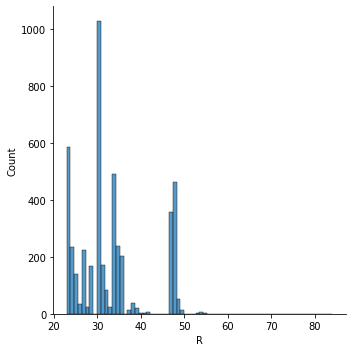

In [75]:
sns.displot(data=rfm, x='R', bins=70)

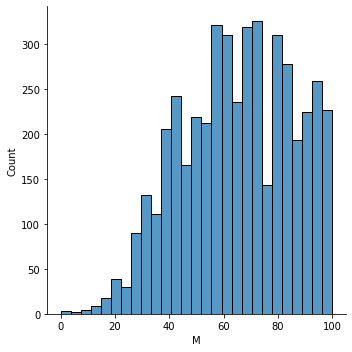

In [76]:
sns.displot(data=rfm, x='M')

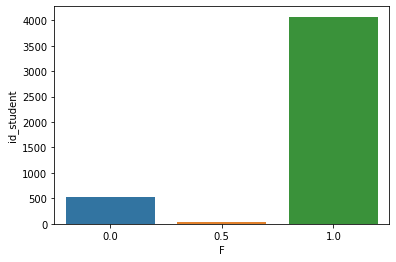

In [77]:
obchee = rfm.groupby('F', as_index=False).id_student.count()
sns.barplot(data=obchee, x='F', y='id_student')

In [ ]:
'''
Из-за ограниченного числа значений в метрике завершаемости курсов, я разделю данные на сегменты, в каждом из которых будет по три значения.

Для  среднего срока сдачи экзаменов :
1 - <30 дней (быстро)
2 - [30;40] (средний темп)
3 - >40 дней (медленный)

Для уровня завершаемости :
1 - 0  (ни один курс не завершен)
2 - 0.5 (половина курсов завершена)
3 - 1 (все курсы завершены)

Для среднего скора :
1 - [0;40] (незачет)
2 - [40;80] (хорошо)
3 - [80;100] (отлично)

In [78]:
def score(x):
    if x < 40:
        return 1
    elif x < 80:
        return 2
    else:
        return 3

In [79]:
def time(x):
    if x <= 30:
        return 3
    elif x < 40:
        return 2
    else:
        return 1

In [80]:
def completion(x):
    if x == 0:
        return 1
    elif x == 0.5:
        return 2
    else:
        return 3 

In [82]:
rfm['M'] = rfm['M'].apply(lambda x: score(x))
rfm['R'] = rfm['R'].apply(lambda x: time(x))
rfm['F'] = rfm['F'].apply(lambda x: completion(x))

In [83]:
rfm['RFM'] = rfm['R'].astype('string') + rfm['F'].astype('string') + rfm['M'].astype('string')

In [84]:
rfm

,id_student,R,F,M,RFM
0,23698,3,3,3,333
1,24213,2,3,2,232
2,27116,3,3,3,333
3,28046,3,3,2,332
4,28787,3,3,2,332
...,...,...,...,...,...
4628,2694886,2,3,2,232
4629,2694933,3,3,2,332
4630,2695608,3,3,2,332
4631,2697181,3,3,3,333


In [85]:
rfm.groupby('RFM').id_student.count().to_frame().reset_index().sort_values('id_student', ascending=False)

,RFM,id_student
11,332,1425
6,232,737
12,333,697
1,132,594
7,233,405
8,311,299
2,133,211
3,211,127
0,111,110
5,222,11


In [87]:
# уровень вовлеченности 
# 1 - наиб высокая, тк быстрее сдают и больше завершаемости
# 2 - наим высокая, тк медленнее сдают и меньше завершаемости
dict_rfm={'333' : '1',
          '332' :  '2',
          '322' :  '3',
          '321' :  '4',
          '311' :  '5',
          '233' :  '6',
          '232' :  '7',
          '222' :  '8',
          '221' :  '9',
          '211' :  '10'
}

In [88]:
rfm['category'] = rfm.RFM.map(dict_rfm)

In [89]:
rfm.head()

,id_student,R,F,M,RFM,category
0,23698,3,3,3,333,1
1,24213,2,3,2,232,7
2,27116,3,3,3,333,1
3,28046,3,3,2,332,2
4,28787,3,3,2,332,2


In [90]:
grouped_rfm = rfm.groupby(['category', 'RFM']).id_student.count().to_frame().reset_index().rename(columns={'id_student' : 'student_count'})
grouped_rfm = grouped_rfm.sort_values('student_count', ascending=False).head()
grouped_rfm

,category,RFM,student_count
2,2,332,1425
7,7,232,737
0,1,333,697
6,6,233,405
5,5,311,299


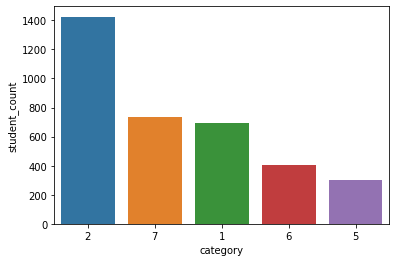

In [100]:
sns.barplot(data = grouped_rfm.sort_values('student_count', ascending=False), x='category', y='student_count')

In [ ]:
'''
ВЫВОДЫ
1. Преположим, что курс это 'Предмет' + 'Семестр'
2. Один курс сдавали большинство студентов
3. В данных имеется информация о 7 предметах. Предмет BBB самый популярный (7900), но и в нем большой отток(2377). 
   В целом у предметов достаточно большой отток (в некоторых случаях - около половины студентов).
4. Средний срок сдачи экзамена до даты дедлайна ССС - 18.7 ; DDD - 15.8)
5. Был проведен rfm - анализ аудитории. 
   Для сегмантации был использован уровень вовлеченности студентов в обучение 
   (уровень средних оценок за экзамен, среднее время на сдачу экзамена, уровень завершаемости курсов) 
   Топ 3 сегмента аудитории - группы с во влеченностью уровня 2, 7, 1 соответственно. 
   = > большая часть аудитории хорошо вовлечена в обучение!